<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day13_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis
This notebook covers the concepts and models discussed in the presentation, with examples and visualizations to make the topics clearer.

## 1. Introduction to Time Series
**Definition**: A time series is a sequence of data points collected or recorded at specific time intervals.

**Examples**: Stock prices, weather data, sales data.

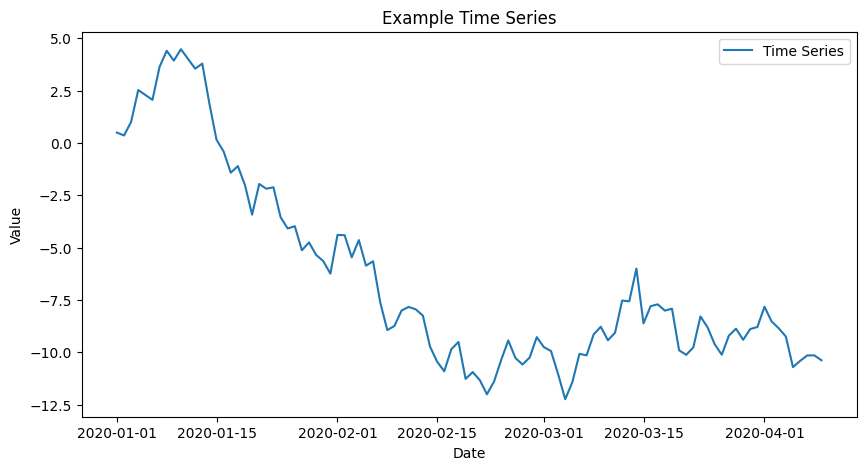

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
time = pd.date_range('2020-01-01', periods=100, freq='D')
data = np.cumsum(np.random.randn(100))
df = pd.DataFrame({'Date': time, 'Value': data}).set_index('Date')

# Plot example time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Value'], label='Time Series')
plt.title('Example Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## 2. Time Series Decomposition
**Components**:
- **Trend**: Long-term progression in the data.
- **Seasonality**: Regular patterns repeating over time.
- **Residual**: Random variations.

### Example: Decomposing a Synthetic Time Series

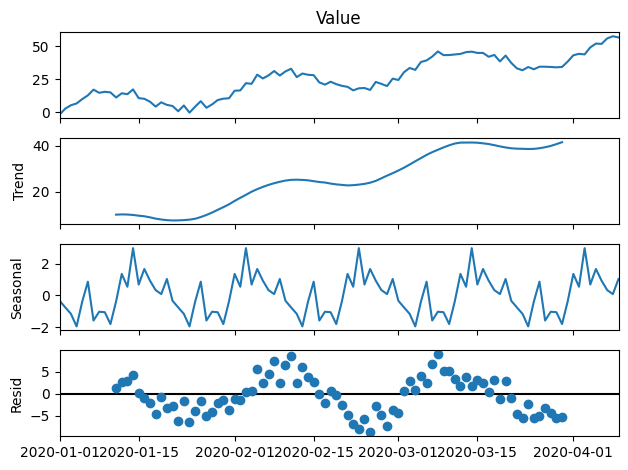

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate seasonal data
seasonal = 10 * np.sin(np.linspace(0, 20, 100))
trend = np.linspace(1, 50, 100)
noise = np.random.normal(0, 2, 100)
synthetic_data = seasonal + trend + noise
synthetic_df = pd.DataFrame({'Date': time, 'Value': synthetic_data}).set_index('Date')

# Decompose the series
decomposition = seasonal_decompose(synthetic_df['Value'], model='additive', period=20)

# Plot decomposition
decomposition.plot()
plt.show()

## 3. Trend Estimation
**Methods**:
- **Moving Average**: Smooths the data by averaging over a window.
- **Exponential Smoothing**: Applies decreasing weights to older observations.

### Example: Moving Average

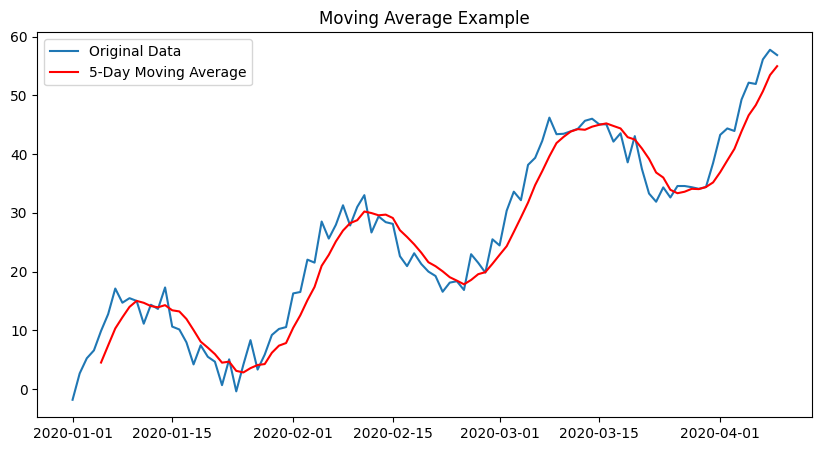

In [3]:
# Apply moving average
window = 5
synthetic_df['Moving Average'] = synthetic_df['Value'].rolling(window=window).mean()

# Plot moving average
plt.figure(figsize=(10, 5))
plt.plot(synthetic_df['Value'], label='Original Data')
plt.plot(synthetic_df['Moving Average'], label=f'{window}-Day Moving Average', color='red')
plt.title('Moving Average Example')
plt.legend()
plt.show()

## 4. Common Models for Time Series Prediction
### AR, ARMA, ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


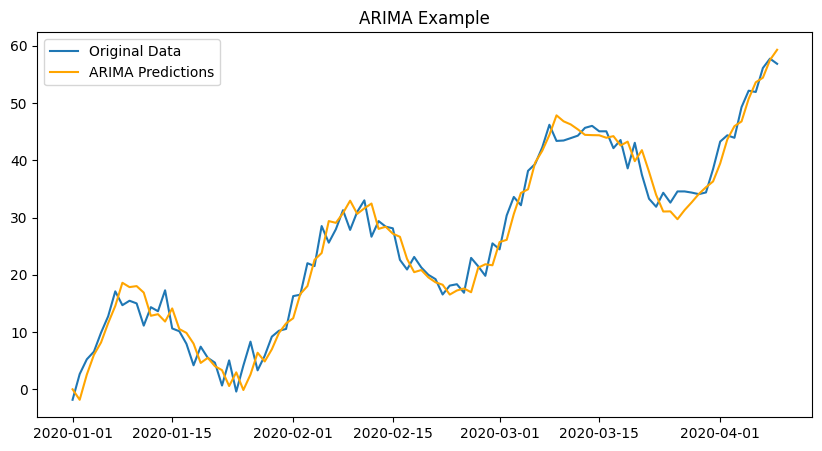

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(synthetic_df['Value'], order=(2, 1, 2))
arima_result = model.fit()

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(synthetic_df['Value'], label='Original Data')
plt.plot(arima_result.fittedvalues, label='ARIMA Predictions', color='orange')
plt.title('ARIMA Example')
plt.legend()
plt.show()

## 5. Advanced Models: LSTMs and Transformers
### Example: Using LSTMs

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3431
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2359 
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1539 
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0962 
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0379 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


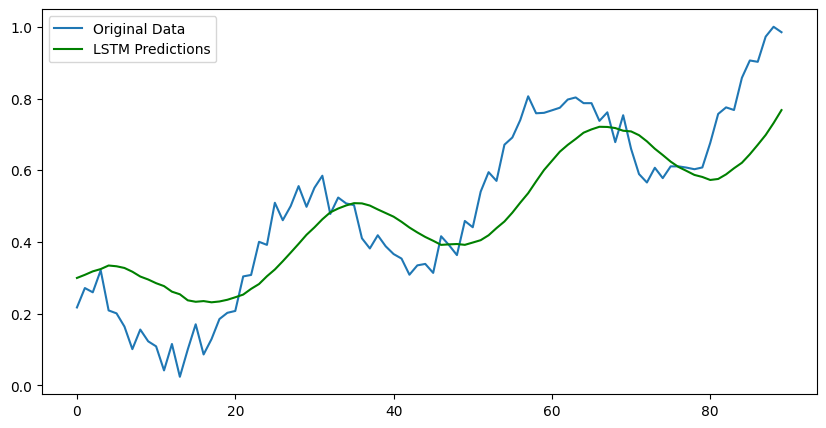

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_df['Value'].values.reshape(-1, 1))
X = []
y = []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
X = X.reshape((X.shape[0], X.shape[1], 1))
model.fit(X, y, epochs=5, batch_size=16, verbose=1)

# Predict and plot
predictions = model.predict(X)
plt.figure(figsize=(10, 5))
plt.plot(scaled_data[10:], label='Original Data')
plt.plot(predictions, label='LSTM Predictions', color='green')
plt.legend()
plt.show()